# Palmer Penguins

***

Artwork by @allison_horst.

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/palmerpenguins.png' title="Palmer Penguins" width="240px">

This notebook contains my analysis of the famous palmer penguins dataset.

Refer to the [official site](https://allisonhorst.github.io/palmerpenguins/) for more information on palmerpenguins.


## Imports

***

Let's import 3 packages which will be used throughout this notebook:

- [Pandas](https://pandas.pydata.org/docs/index.html) enables us to load tabular data (such as a csv file) as a Data Frame and perform analysis on the data.
- [Numpy](https://numpy.org/) enables us to store data as arrays and process these in a performant manner.
- [Matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html) enables us to create visualizations such as bar charts, histograms and scatterplots.

In [1]:
# Import pandas, numpy, matplotlib.pyplot and scipy.stats.norm packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data & Data Overview

***

Load the palmer penguins data set from a URL (csv file) into a pandas Data Frame.\
(Rather than using the [palmerpenguins raw data](https://github.com/allisonhorst/palmerpenguins/blob/main/inst/extdata/penguins.csv) which is well shaped for the R programming language, we will use an [alternative dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv) which removes the 'year' variable, and has some minor edits which lend themselves towards analysis using Python. For example, NAs have been removed which would be read in as values in Python.)


In [2]:
# Load the data.
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

The data is now loaded and we can generate an overview by printing the Data Frame to our console. (The Data Frame is truncated to display the first 5 and last 5 records)

In [3]:
# Let's have an initial look. 
# https://pandas.pydata.org/docs/user_guide/dsintro.html#console-display
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We can see from the above table there are 344 rows (records), each representing an individual penguin, and 7 columns (variables). Of the 7 columns, 3 are categorical (species, island and sex) and the rest are numeric. Next, let's generate descriptive statistics on the numeric data, and print a concise summary of the DataFrame.

In [4]:
# Describe the data set.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
# Return information about the data.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


From the above summary, we can see 5 columns contain null values (where Non-Null Count < 344). These will need to be considered when we perform computations on the data.

In [6]:
# Count missing values.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
# Count unique values per variable
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html#pandas.DataFrame.nunique
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

We now have enough high level information to summarise the variables in the next section, before diving deeper into the data.

## Variables

***

Artwork by @allison_horst.

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png' title="Penguin Bills" width="480px">

The below table provides a summary of the variables in the data set. For each variable, it provides the:
- Definition of the variable, per the [Reference page for the simplified data set](https://allisonhorst.github.io/palmerpenguins/reference/penguins.html).
- _Type_ that should be used to model the variable in the data set in Python.
- Rationale for the variable type.
<br/><br/>

|Variable          |Definition                                                                              |Type       |Rationale                                          |
|------------------|:---------------------------------------------------------------------------------------|:----------|:--------------------------------------------------|
|species           |a factor denoting penguin species (Adélie, Chinstrap and Gentoo)                        |str        |species values are one of three strings            |
|island            |a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen) |str        |island values are one of three strings             |            
|bill_length_mm    |a number denoting bill length (millimeters)                                             |float      |bill_length_mm values are floating point numbers   |
|bill_depth_mm     |a number denoting bill depth (millimeters)                                              |float      |bill_depth_mm values are floating point numbers    |            
|flipper_length_mm |an integer denoting flipper length (millimeters)                                        |float      |flipper_length_mm values are floating point numbers|
|body_mass_g       |an integer denoting body mass (grams)                                                   |float      |body_mass_mm values are floating point numbers     |
|sex               |a factor denoting penguin sex (female, male)                                            |str        |sex values are one of two strings                  |



## Inspect Data

***

In this section we will take a closer look at the data to try to glean some insights.\
The work below is my own but this [video on data manipulation for palmerpenguins using pandas](https://www.youtube.com/watch?v=uiYgZomY-v4) gave me some inspiration for this section of analysis.\
<br/><br/>
Let's begin by taking a look at the counts and mean values across both male and female penguins.

In [8]:
# Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [9]:
# Group mean values (excluding missing values) by sex, sort by body mass in descending order.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html#pandas.core.groupby.DataFrameGroupBy.mean
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values
df.groupby('sex').mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
MALE,45.854762,17.891071,204.505952,4545.684524
FEMALE,42.096970,16.425455,197.363636,3862.272727


On average, we can say that the male penguins measured in this dataset have longer & deeper bills, longer flippers, and are heavier than their female counterparts. Roughly the same number of penguins have been measured across both sexes (with 11 missing values, as we saw earlier).

Let's take a look at the averages per species next.

In [10]:
# Group means values by species.
df.groupby('species').mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Gentoo,47.504878,14.982114,217.186992,5076.016260
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Adelie,38.791391,18.346358,189.953642,3700.662252


In [11]:
# Species Ranking: Let's use the rank() API to rank the mean values in the table above (lower rank => higher mean).
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rank.html#pandas.DataFrame.rank
df.groupby('species').mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False).rank(ascending=False)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Gentoo,2.0,3.0,1.0,1.0
Chinstrap,1.0,1.0,2.0,2.0
Adelie,3.0,2.0,3.0,3.0


On average, we can say that the Gentoo species are the heaviest of the three and have the longest flippers, followed by the Chinstraps and Adelies respectively.\
Now let's take a look at what species were measured on each island.

In [12]:
# Let's take a closer look at the species found on the different islands.
df.groupby(["species","island"])["species"].count()

species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     52
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: species, dtype: int64

In [13]:
# Let's break the mean values down by both island and species.
df.groupby(["island","species"]).mean(numeric_only=True).sort_values(by = ['body_mass_g'], ascending=False)

,,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,species,,,,
Biscoe,Gentoo,47.504878,14.982114,217.186992,5076.016260
Dream,Chinstrap,48.833824,18.420588,195.823529,3733.088235
Biscoe,Adelie,38.975000,18.370455,188.795455,3709.659091
Torgersen,Adelie,38.950980,18.429412,191.196078,3706.372549
Dream,Adelie,38.501786,18.251786,189.732143,3688.392857


The Adelie species were measured on all three islands (being the only species measured on Torgersen island), whereas the Chinstrap and Gentoo species were measured solely on Dream island and Biscoe island respectively. 
</br></br>
The below graphic shows Antartica (a), the Antarctic Peninsula (b) and the three islands off Anvers island with the associated penguin species that were measured (c).
Image citation: Gorman, Kristen B. & Williams, Tony & Fraser, William. (2014). Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PloS one. 9. e90081. 10.1371/journal.pone.0090081. 

 <img src = "https://www.researchgate.net/profile/William-Fraser/publication/260557350/figure/fig1/AS:214343384866816@1428114853304/Fieldwork-for-the-present-study-took-place-within-the-Palmer-Archipelago-near-Anvers.png">

## Visualisations

***

#### Bar Chart

***

Bar charts are suitable for visualizing discrete data. Let's plot the number of penguins measured per species on a bar chart, but first we need to create numpy arrays of the data we want to plot.

In [14]:
# Create numpy arrays for the data in the DataFrame to be plotted.
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
species, specie_count  = np.unique(df["species"], return_counts=True)

#Show arrays.
species, specie_count

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([152,  68, 124], dtype=int64))

Text(0.5, 1.0, 'Species Count')

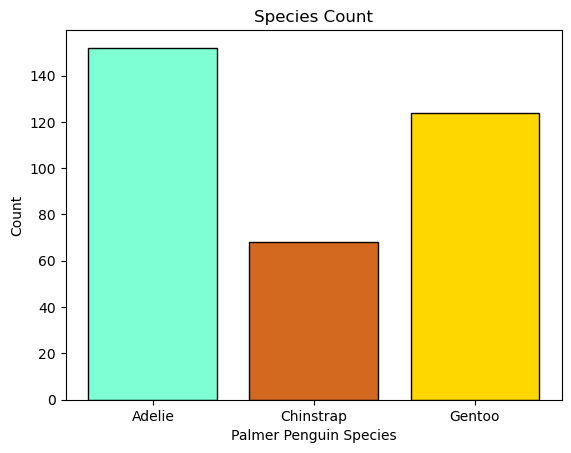

In [15]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html

# Create a new figure and set of axes.
fig1, ax1 = plt.subplots()

# Simple bar chart.
ax1.bar(species,specie_count,edgecolor='black', color=['aquamarine', 'chocolate', 'gold'])

# Axis labels.
ax1.set_xlabel("Palmer Penguin Species")
ax1.set_ylabel("Count")

# Title.
ax1.set_title("Species Count")

More Adelie penguins were measured, possibly because these are more populous in the region, re-affirmed by the fact that Adelies were measured across all three islands whereas Chinstraps and Gentoos were measured solely on Dream and Biscoe islands respectively.

#### Histogram

***

Histograms are suitable for visualizing continuous distributions. Let's plot the flipper length observations per species on histograms, but first we need to create data series for the data we want to plot.

In [16]:
# Create subset dataframes for the different species
adelie_df = df[df["species"].str.contains("Adelie")]
chinstrap_df = df[df["species"].str.contains("Chinstrap")]
gentoo_df = df[df["species"].str.contains("Gentoo")]

In [17]:
# Create series for the flipper lengths (flen) by species
adelie_flen = adelie_df["flipper_length_mm"]
chinstrap_flen = chinstrap_df["flipper_length_mm"]
gentoo_flen = gentoo_df["flipper_length_mm"]

Now we have isolated the (three) data series for the flipper lengths per species, we can visualize these on histograms.

Text(0, 0.5, 'Count')

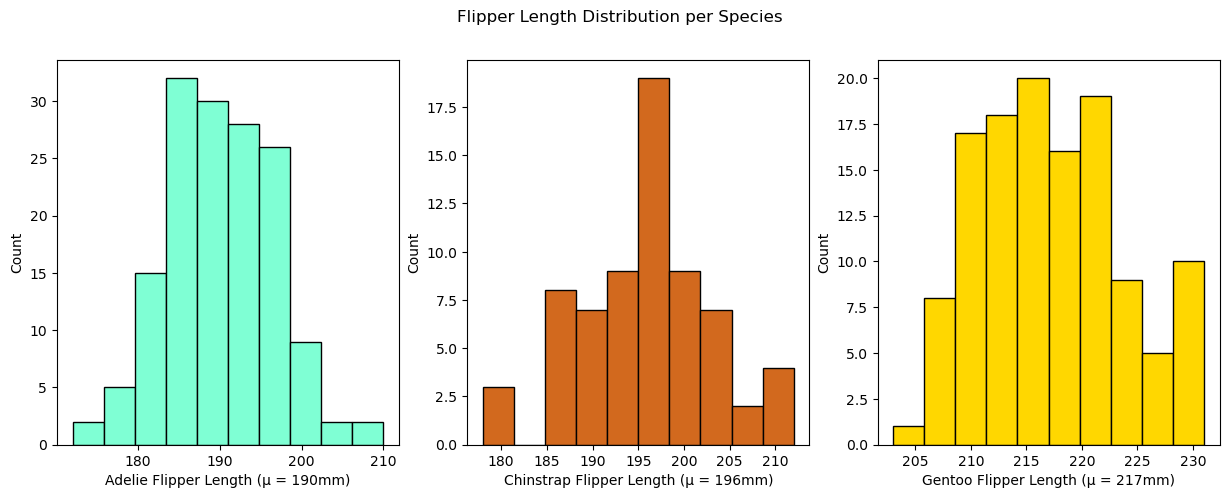

In [18]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_adjust.html
# https://matplotlib.org/stable/gallery/statistics/hist.html

# Create a new figure and set of axes.
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Set figure title & size.
fig2.suptitle('Flipper Length Distribution per Species')
fig2.set_figheight(5)
fig2.set_figwidth(15)

# Plot the three histograms on seperate axes.
ax1.hist(adelie_flen, edgecolor='black', color="aquamarine")
ax2.hist(chinstrap_flen, edgecolor='black', color="chocolate")
ax3.hist(gentoo_flen, edgecolor='black', color="gold")

# Axis labels.
ax1.set_xlabel("Adelie Flipper Length (μ = 190mm)")
ax1.set_ylabel("Count")

ax2.set_xlabel("Chinstrap Flipper Length (μ = 196mm)")
ax2.set_ylabel("Count")

ax3.set_xlabel("Gentoo Flipper Length (μ = 217mm)")
ax3.set_ylabel("Count")

We can see that the distributions of the flipper lenghts for all three species are centred around their mean values.
The shape of the distribution for the Chinstrap flipper lengths is bell shaped, with one single peak in the middle of the distribution.
A [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution) would be a good fit for this shape of data.
</br></br>
Let's plot the same histograms on the one axis for ease of comparison. 

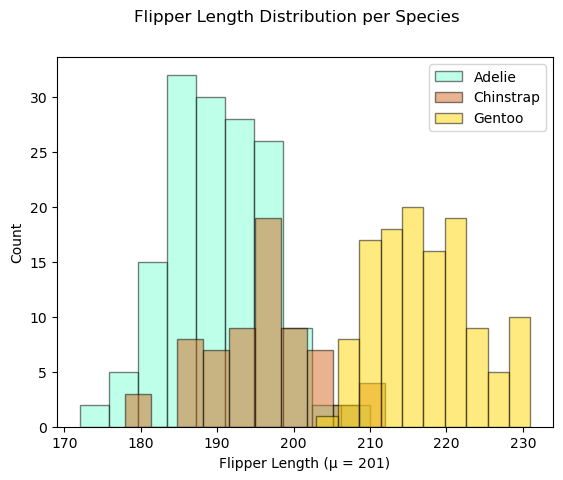

In [19]:
# Overlay the above 3 histograms on one subplot, adjusting the transparency with the alpha parameter
# https://matplotlib.org/stable/users/explain/colors/colors.html#transparency
# https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot

# Create a new figure and set of axes.
fig3, ax1 = plt.subplots()

# Set figure title
fig3.suptitle('Flipper Length Distribution per Species')

# Plot the three histograms
ax1.hist(adelie_flen, edgecolor='black', color="aquamarine", alpha=0.5)
ax1.hist(chinstrap_flen, edgecolor='black', color="chocolate", alpha=0.5)
ax1.hist(gentoo_flen, edgecolor='black', color="gold", alpha=0.5)

# Axis labels.
ax1.set_xlabel("Flipper Length (μ = 201)")
ax1.set_ylabel("Count")

plt.legend(['Adelie','Chinstrap','Gentoo'])

The shape of the total distribution is substantially different to the shapes of the distributions for the individual species.

Note: Due to the Fence Post problem, a Histogram's right most bin includes the upper limit value, resulting in this bin having a slightly higher range of values than the other bins.

#### Scatterplot (Correlation)

***

From our previous analysis, we saw that the heavier penguins also had longer flipper lengths. Let's examine this relationship further by testing for correlation.

In [20]:
# Create an array of flipper lengths from our original DataFrame.
flen = df['flipper_length_mm'].to_numpy()

In [21]:
# Create an array of flipper lengths from our original DataFrame..
bmass = df['body_mass_g'].to_numpy()

Now that we have the two arrays of data we are interest in, let's plot them against each other on a scatter plot.

(170.0, 235.0)

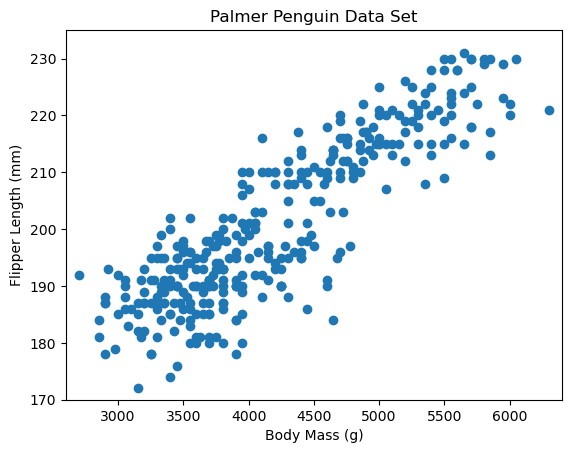

In [22]:
# Create a new figure and set of axes.
fig4, ax = plt.subplots()

# Simple plot.
ax.plot(bmass, flen, 'o')

# Axis labels.
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Flipper Length (mm)')

# Title.
ax.set_title('Palmer Penguin Data Set')

# X limits.
ax.set_xlim(2600, 6400)

# Y limits.
ax.set_ylim(170, 235)

The points on this scatterplot are bunched together and there is a clear trend up along the y-axis (Flipper Length) as we move from left to right along the x-axis (Body Mass). This indicates a strong, positive correlation. Let's overlay this scatterplot with a line of best fit and finally calculate the correlation co-efficient to ascertain.

#### Add a Best Fit Line

***

Line of Best Fit: \
$ y = mx + c = p_1 x^1 + p_0 = p_1x + p_0 $

where
- m is Slope of Line
- c is Y-intercept

In order to compute the values for m & c, we need to remove NaN values from our two arrays.

In [23]:
# Remove NaN values from bmass and flen arrays.
bmass = bmass[~np.isnan(bmass)]
flen = flen[~np.isnan(flen)]

In [24]:
# Fit a straight line between x and y.
m, c = np.polyfit(bmass, flen, 1)

(170.0, 235.0)

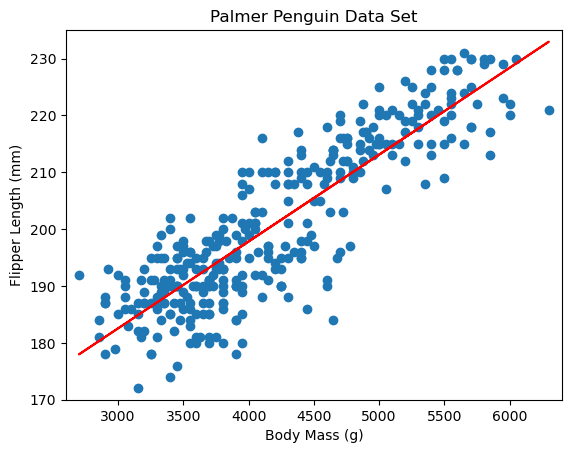

In [25]:
# Create a new figure and set of axes.
fig5, ax = plt.subplots()

# Simple plot.
ax.plot(bmass, flen, 'o')

# Simple plot.
ax.plot(bmass, m * bmass + c, 'r-')

# Axis labels.
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Flipper Length (mm)')

# Title.
ax.set_title('Palmer Penguin Data Set')

# X limits.
ax.set_xlim(2600, 6400)

# Y limits.
ax.set_ylim(170, 235)

Correlation Coefficient

$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$

where,

$\rho$ = [Pearson's product-moment correlation](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php) coefficient\
${cov}(X,Y)$ = covariance of variables\
$\sigma_x$ = standard deviation of x\
$\sigma_y$ = standard deviation of y

In [26]:
# Measure the correlation.
np.corrcoef(bmass, flen)

array([[1.        , 0.87120177],
       [0.87120177, 1.        ]])

A [correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) of .87 indicates a strong positive association between flipper length and body mass.

## Summary

***

**Findings in Brief**:
- Male penguins are heavier on average than their femal counterparts.
- On average, the Gentoo species are the heaviest of the three species and have the longest flippers, followed by the Chinstraps and Adelies respectively.
- The Adelie species were measured across all three islands, whereas the Chinstraps and Gentoos were measured solely on Dream Island and Biscoe Island respectively.
- More Adelie species are present in the dataset, possibly indicating that these are more populous in the region.
- There is a strong positive correlation between body mass and flipper length.

**Extension and Further Study**:
- These findings could help with predicting penguin characteristics in the region based on certain variables. For example, bigger birds are more likely to be male than female, heavier birds are more likely to have longer flipper lengths, etc.
- We could also extend the study to show correlations of other variables and explore [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox) by ommitting species, as [discovered by the original study](https://allisonhorst.github.io/palmerpenguins/articles/examples.html) 

**Challenges Faced**:\
During this project, I have observed some issues while attempting to visualise the data, namely:
- Data cleansing is required in some cases (e.g. dropping NaN values)
- The Fence Post problem that has a slight impact to histogram bins (right most bin includes max value) 
- Visualisation becomes more challenging the more variables (dimensions) that are plotted. 

***

## End